<ipython-input-39-360367b1c005>:32: RuntimeWarning: divide by zero encountered in double_scalars
  xn1 = xn - df(f,xn) /dosdf(f, xn)
<ipython-input-39-360367b1c005>:34: RuntimeWarning: divide by zero encountered in double_scalars
  error = np.abs(df(f,xn) /dosdf(f, xn))
<ipython-input-39-360367b1c005>:18: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x+h)-f(x-h))/(2*h)
<ipython-input-39-360367b1c005>:21: RuntimeWarning: invalid value encountered in double_scalars
  return (f(x+h)- 2*f(x) + f(x-h))/(h**2)


0.31690576 7.349795676886238
1.0281946848372958 2.442026437189683
0.7518796983375419 0.7518796992481203


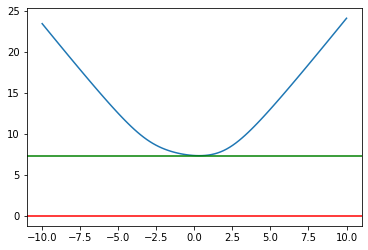

In [39]:
# PARCIAL 1 JUAN SEBASTIÁN SÁNCHEZ Y JACOBO TREJOS

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# MINIMIZACIÓN

n0 = 1
n1 = 1.33
R = np.array([2,-2])
T = np.array([-3,2])
h = 1e-5
precision=1e-6

def Function(x):
  return (n0*np.sqrt((x - T[0])**2 + T[1]**2)) + (n1*np.sqrt((x - R[0])**2 + R[1]**2))

def FirstDerivative(f,x):
  return (f(x+h)-f(x-h))/(2*h)

def SecondDerivative(f,x):
  return (f(x+h)- 2*f(x) + f(x-h))/(h**2)

def GetNewtonRaphson(f,df, dosdf, xn,itmax = 100):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - df(f,xn) /dosdf(f, xn)
            
            error = np.abs(df(f,xn) /dosdf(f, xn))
            
            #print(error)
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn

def GetAllRoots(x,tolerancia=8):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonRaphson(Function, FirstDerivative, SecondDerivative, i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots
   
x = np.linspace(-10,10,100)
y = Function(x)

plt.plot(x,y)
plt.axhline(y=0,color='r')

roots = GetAllRoots(x)

def minimos(roots,f, h=1e-5):

  minimos = np.array([])

  for root in roots:

    if f(root-h) > f(root) and f(root+h) > f(root):
      minimos = np.append(minimos,root)

  return min(minimos)

x = np.linspace(0,18,100)
Roots = GetAllRoots(x)
minimo = minimos(Roots,Function)
print(minimo, Function(minimo))
plt.axhline(y=Function(minimo), color='g')

# CÁLCULO DE ÁNGULOS

opuesto1 = (abs(T[0]) + minimo)
hipotenusa1 = np.sqrt(T[1]**2 + opuesto1**2)
alpha0 = np.arcsin(opuesto1 / hipotenusa1)

opuesto2 = R[1]
adyacente = R[0] - minimo
hipotenusa2 = np.sqrt(opuesto2**2 + adyacente**2 )
alpha1 = np.arcsin(1) - np.arcsin(opuesto2 / hipotenusa2)

# CONFIRMACIÓN DE LA LEY DE SNELL

print(alpha0, alpha1)
print(np.sin(alpha1)/np.sin(alpha0), n0/n1)




